In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import datetime

In [2]:
contracts_df = pd.read_csv("contract_apy_by_year.csv", thousands = ",")
contracts_df["apy_cap_pct"] = contracts_df["apy_cap_pct"]*100
print(contracts_df.shape)
print(contracts_df.head())

(17372, 35)
   Unnamed: 0          player position      team  is_active  year_signed  \
0           1      Joe Burrow       QB   Bengals       True         2023   
1           2      Josh Allen       QB     Bills       True         2021   
2           3    Dak Prescott       QB   Cowboys       True         2024   
3           4  Justin Herbert       QB  Chargers       True         2023   
4           5   Lamar Jackson       QB    Ravens       True         2023   

   years  value   apy  guaranteed  ...  season  cap_total  cap_pct  apy_rank  \
0      5  275.0  55.0  219.010000  ...    2024      255.4    0.215         1   
1      6  258.0  43.0  150.000000  ...    2024      255.4    0.168         1   
2      4  240.0  60.0  231.000000  ...    2024      255.4    0.235         1   
3      5  262.5  52.5  193.738375  ...    2024      255.4    0.206         1   
4      5  260.0  52.0  185.000000  ...    2024      255.4    0.204         1   

  top_5  top_10 middle_35 middle_30 rest  is_rooki

   season Grouped Positions  Median
0    2014                DB     0.6
1    2014                DL     1.1
2    2014                LB     0.5
3    2014                OL     0.7
4    2014                QB     1.5


C:\Users\Dev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


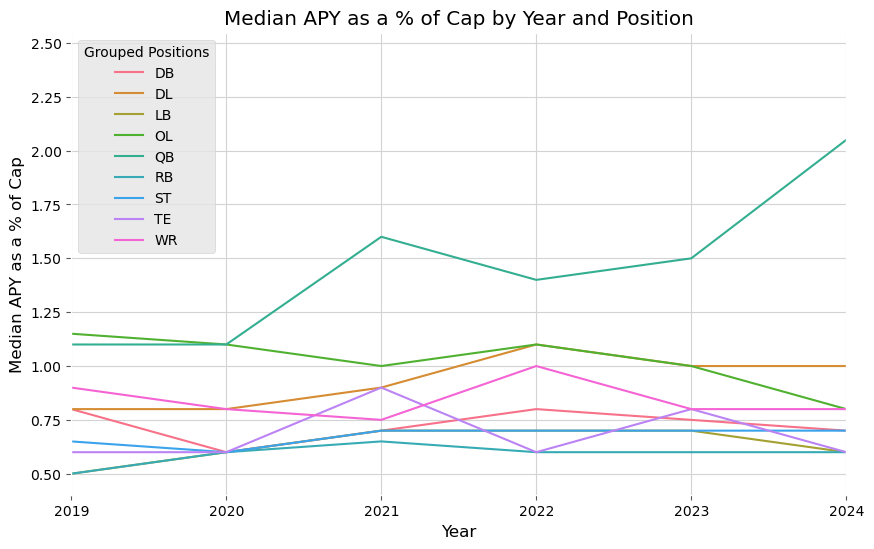

In [38]:
positions_map = {
    'C': 'OL',
    'CB': 'DB',
    'ED': 'DL',
    'IDL': 'DL',
    'FB': 'RB',
    'FS': 'DB',
    'G': 'OL',
    'ILB': 'LB',
    'K': 'ST',
    'KR': 'ST',
    'LB': 'LB',
    'LS': 'ST',
    'LT': 'OL',
    'LG' : 'OL',
    'OLB': 'LB',
    'P': 'ST',
    'QB': 'QB',
    'RB': 'RB',
    'RT': 'OL',
    'RG': 'OL',
    'S': 'DB',
    'SS': 'DB',
    'T': 'OL',
    'TE': 'TE',
    'WR': 'WR',
    'OL': 'OL',
    'WLB': 'LB'
}

contracts_df['Grouped Positions'] = contracts_df['position'].replace(positions_map)

pos_df = contracts_df.groupby(['season', 'Grouped Positions']).agg(Median=('apy_cap_pct', 'median')).reset_index()

print(pos_df.head())

plt.figure(figsize=(10, 6))
sns.lineplot(data=pos_df, x='season', y='Median', hue='Grouped Positions', errorbar=None)
plt.style.use('ggplot')
plt.title('Median APY as a % of Cap by Year and Position')
plt.xlabel('Year', color="black")
plt.ylabel('Median APY as a % of Cap', color="black")
plt.xticks(color='black')
plt.yticks(color='black')

plt.gca().set_facecolor('white')
plt.grid(color='#d3d3d3')
    
#formatter = FuncFormatter(millions)
#plt.gca().yaxis.set_major_formatter(formatter)

plt.xlim(2019, 2024)

plt.show()

# could use 2019 and onward (past 5 szns) to eliminate 2018 issue

C:\Users\Dev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


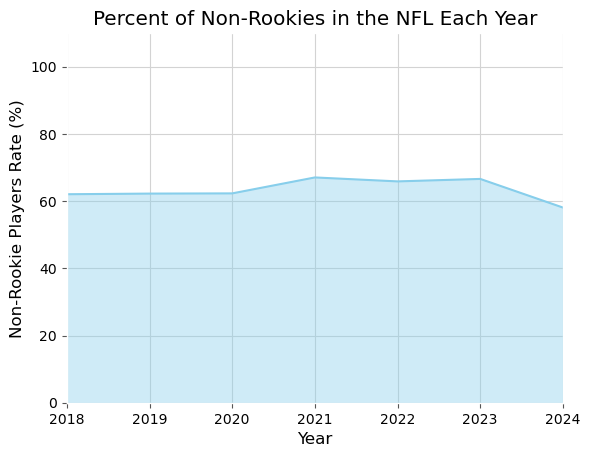

In [39]:
# Calculate the percent of non-rookies each year
non_rookie_percent = contracts_df[contracts_df['is_rookie'] == False].groupby('season').size() / contracts_df.groupby('season').size() * 100
non_rookie_percent = non_rookie_percent.reset_index(name='percent_non_rookies')

# Plot the percent of non-rookies each year
sns.lineplot(data=non_rookie_percent, x='season', y='percent_non_rookies', color="skyblue")
plt.fill_between(non_rookie_percent['season'], non_rookie_percent['percent_non_rookies'], color='skyblue', alpha=0.4)
plt.title('Percent of Non-Rookies in the NFL Each Year')
plt.xlabel('Year', color="black")
plt.ylabel('Non-Rookie Players Rate (%)', color='black')
plt.xlim(2018, 2024)
plt.ylim(0, 110)
plt.xticks(color='black')
plt.yticks(color='black')

plt.gca().set_facecolor('white')
plt.grid(color='#d3d3d3')




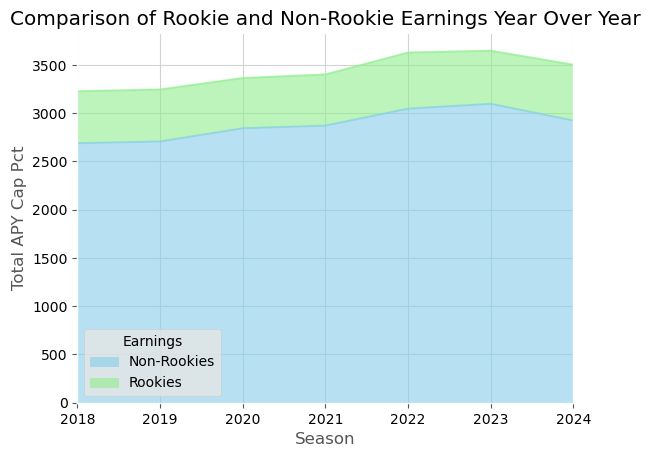

In [40]:
# Calculate the total earnings of rookies and non-rookies each year
earnings = contracts_df.groupby(['season', 'is_rookie'])['apy_cap_pct'].sum().unstack().fillna(0)
earnings.columns = ['Non-Rookies', 'Rookies']

# Plot the stacked area graph
earnings.plot(kind='area', stacked=True, color=['skyblue', 'lightgreen'], alpha=0.6)
plt.title('Comparison of Rookie and Non-Rookie Earnings Year Over Year')
plt.xlabel('Season')
plt.ylabel('Total APY Cap Pct')
plt.legend(title='Earnings')
plt.xlim(2018, 2024)
plt.xticks(color='black')
plt.yticks(color='black')

plt.gca().set_facecolor('white')
plt.grid(color='#d3d3d3')

C:\Users\Dev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 11.0)

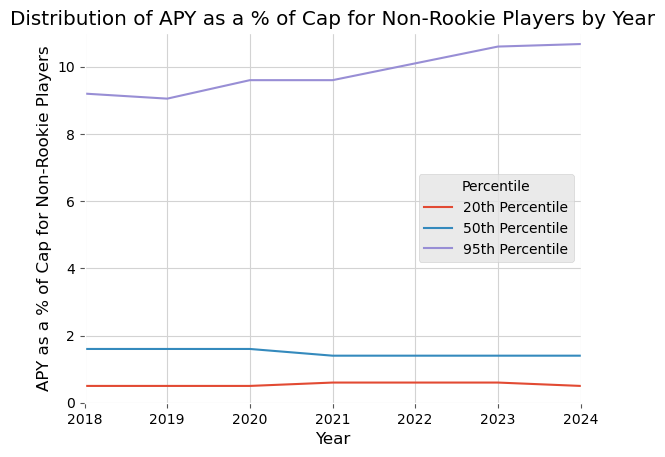

In [42]:
# Sort by Player and Year
contracts_df = contracts_df.sort_values(by=['player', 'season'])

# Calculate experience (is_rookie = True)
contracts_df['experience'] = contracts_df.groupby('player').cumcount()

# Filter for those with 5 or more years of experience (is_rookie = False)
experienced_df = contracts_df[contracts_df['is_rookie'] == False]

# Calculate the sum of apy cap pct for experienced players for each year
sum_salary_experienced = experienced_df.groupby(['season', 'player'])['apy_cap_pct'].sum().reset_index()

# Calculate percentiles for each year
percentiles = sum_salary_experienced.groupby('season')['apy_cap_pct'].quantile([0.2, 0.5, 0.95]).unstack().reset_index()
percentiles.columns = ['Year', '20th Percentile', '50th Percentile', '95th Percentile']

# Melt the DataFrame to have three rows per year
melted_percentiles = percentiles.melt(id_vars='Year', var_name='Percentile', value_name='sum_salary_experienced')

sns.lineplot(data=melted_percentiles, x='Year', y='sum_salary_experienced', hue='Percentile')
plt.title('Distribution of APY as a % of Cap for Non-Rookie Players by Year', color="black")
plt.xlabel('Year', color="black")
plt.ylabel('APY as a % of Cap for Non-Rookie Players', color="black")

plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')
plt.grid(color='#d3d3d3')

plt.xlim(2018, 2024)
plt.ylim(0, 11)

C:\Users\Dev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


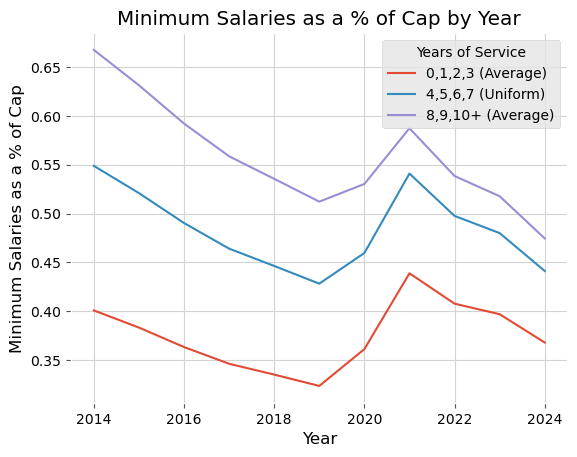

In [43]:
# minimum salaries (rookie and vets) as a % of cap

minandcap_df = pd.read_csv("minandcap.csv", thousands = ",")

minandcap_df["Adj % of Cap"] = minandcap_df["% of Cap"]*100

sns.lineplot(data=minandcap_df, x='Year', y='Adj % of Cap', hue='Years of Service')
plt.title('Minimum Salaries as a % of Cap by Year')
plt.xlabel('Year', color="black")
plt.ylabel('Minimum Salaries as a % of Cap', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')
plt.grid(color='#d3d3d3')

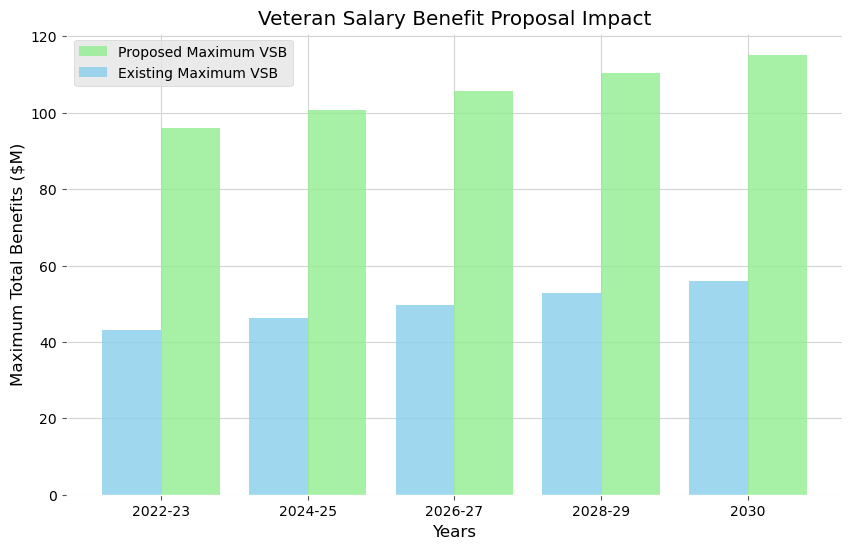

In [44]:
# Data1
data1 = pd.DataFrame({
    "Category": ["2022-23", "2024-25", "2026-27", "2028-29", "2030"],
    "Value": [43.2, 46.4, 49.6, 52.8, 56]
})

# Data2
data2 = pd.DataFrame({
    "Category": ["2022-23", "2024-25", "2026-27", "2028-29", "2030"],
    "Value": [96, 100.8, 105.6, 110.4, 115.2]
})

# Merge data1 and data2 for side-by-side plotting
merged_data = pd.merge(data1, data2, on="Category", suffixes=('_Data1', '_Data2'))

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot data1 and data2 side by side
bar_width = 0.4
categories = merged_data['Category']
bar_positions = range(len(categories))

plt.bar([pos + bar_width/2 for pos in bar_positions], merged_data['Value_Data2'], width=bar_width, label='Proposed Maximum VSB', color='lightgreen', alpha=0.8)
plt.bar([pos - bar_width/2 for pos in bar_positions], merged_data['Value_Data1'], width=bar_width, label='Existing Maximum VSB', color='skyblue', alpha=0.8)

# Add labels and title
plt.title('Veteran Salary Benefit Proposal Impact', color='Black')
plt.xlabel('Years', color="black")
plt.ylabel('Maximum Total Benefits ($M)', color='black')
plt.xticks(bar_positions, categories, color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')
plt.grid(color='#d3d3d3')
plt.legend()


# Show the plot
plt.show()